In [1]:
### Carregar as Libraries
import numpy as np
import pandas as pd
from numpy import mean
from numpy import std

### Importing Dataset
dataset = pd.read_csv('Image.csv',encoding='utf-8')

## Selecionando todos os atributos com exceção da classe
dataset_part01 = dataset.iloc[:, :-1]

X = dataset_part01      # Features
y = dataset.classe      # Target variable (classe)

## Carregando o algoritmo / método / técnica Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

# 10-fold CV
kf = KFold(n_splits=10, random_state=1, shuffle=True)

# Create Decision Tree classifer object
dtc = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Model Accuracy
scores = cross_val_score(dtc, X, y, scoring='accuracy', cv=kf)
print('Accuracy: %.3f (%.3f)' % (scores.mean(), scores.std()))

# Matriz de confusão p/ k fold
y_pred = cross_val_predict(dtc, X, y, cv=kf)
confusion_matrix(y, y_pred)

Accuracy: 0.812 (0.025)


array([[323,   1,   6,   0,   0,   0,   0],
       [  3, 274,  50,   0,   3,   0,   0],
       [ 11,  17, 301,   0,   0,   1,   0],
       [  6,   0,   1, 323,   0,   0,   0],
       [  1,   0,   4,   0, 325,   0,   0],
       [  0,   0,   0,   0,   0, 330,   0],
       [ 64,   3, 263,   0,   0,   0,   0]])

In [2]:
cnt = 1
# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt += 1

print()

# Model Accuracy
scores = cross_val_score(dtc, X, y, scoring='accuracy', cv=kf)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Fold:1, Train set: 2079, Test set:231
Fold:2, Train set: 2079, Test set:231
Fold:3, Train set: 2079, Test set:231
Fold:4, Train set: 2079, Test set:231
Fold:5, Train set: 2079, Test set:231
Fold:6, Train set: 2079, Test set:231
Fold:7, Train set: 2079, Test set:231
Fold:8, Train set: 2079, Test set:231
Fold:9, Train set: 2079, Test set:231
Fold:10, Train set: 2079, Test set:231

Accuracy: 0.812 (0.024)


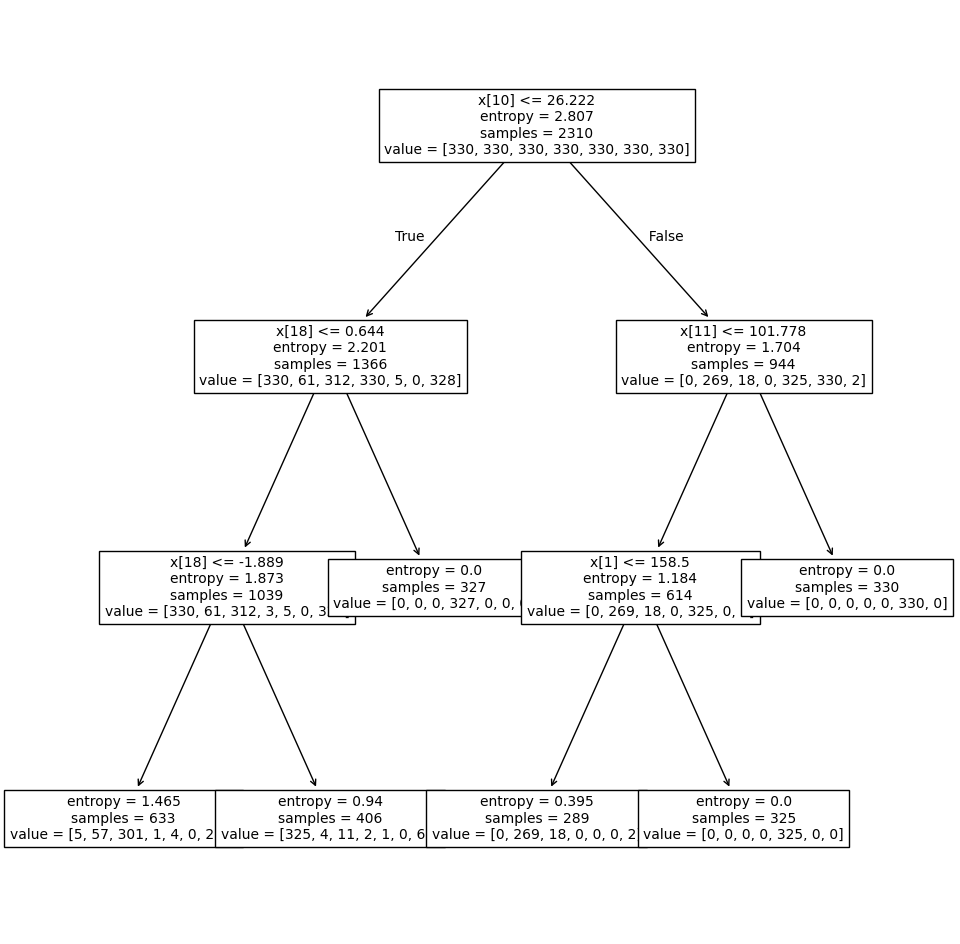

In [3]:
# Mostrando (plotando) a árvore gerada
from sklearn import tree
import matplotlib.pyplot as plt

# set plot size (denoted in inches)
plt.figure(figsize=(12,12))

# Treinamento de um holdout 50-50 para observação da arvore gerada.
dtc.fit(X, y) # - adicionado por Cephas. Treinamento de um holdout 50-50 para observação da arvore gerada.
tree.plot_tree(dtc, fontsize=10)
plt.show()

